In [27]:
from qiskit.circuit.library import TwoLocal #initial/trial wave-function

In [28]:
#Creating ansatz using a initial wave function (TwoLocal) and parametrizing it.
#inputs required for TwoLocal: number of qubits, ry and rc (why ey and rc??)

num_of_qubits = 3
ansatz = TwoLocal(num_of_qubits,"ry", "cz")

#drawing the ansatz circuit  by first decomposing it
ansatz.decompose().draw()

#Two circuits as in second one starts where first one ends
#Here θ[0],  θ[1],...  θ[11] are the parameters to be varied.

┌──────────┐      ┌──────────┐                  ┌──────────┐            »
q_0: ┤ Ry(θ[0]) ├─■──■─┤ Ry(θ[3]) ├─────────────■──■─┤ Ry(θ[6]) ├────────────»
     ├──────────┤ │  │ └──────────┘┌──────────┐ │  │ └──────────┘┌──────────┐»
q_1: ┤ Ry(θ[1]) ├─■──┼──────■──────┤ Ry(θ[4]) ├─■──┼──────■──────┤ Ry(θ[7]) ├»
     ├──────────┤    │      │      ├──────────┤    │      │      ├──────────┤»
q_2: ┤ Ry(θ[2]) ├────■──────■──────┤ Ry(θ[5]) ├────■──────■──────┤ Ry(θ[8]) ├»
     └──────────┘                  └──────────┘                  └──────────┘»
«           ┌──────────┐             
«q_0: ─■──■─┤ Ry(θ[9]) ├─────────────
«      │  │ └──────────┘┌───────────┐
«q_1: ─■──┼──────■──────┤ Ry(θ[10]) ├
«         │      │      ├───────────┤
«q_2: ────■──────■──────┤ Ry(θ[11]) ├
«                       └───────────┘

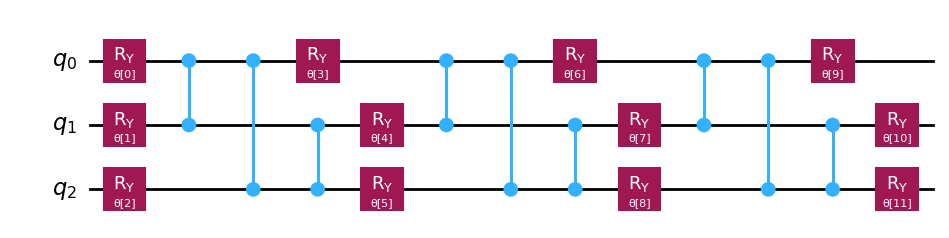

In [29]:
ansatz.decompose().draw('mpl')
#All below gives the same graph:
#ansatz.decompose().draw("mpl")
#ansatz.decompose().draw(output='mpl')
#ansatz.decompose().draw(output="mpl")


In [30]:
#Creating ansatz for number of qubits=2

num_of_qubits = 2
ansatz = TwoLocal(num_of_qubits,"ry", "cz")

#drawing the ansatz circuit  by first decomposing it
ansatz.decompose().draw()

#Here θ[0],  θ[1],...  θ[7] are the parameters to be varied.

┌──────────┐   ┌──────────┐   ┌──────────┐   ┌──────────┐
q_0: ┤ Ry(θ[0]) ├─■─┤ Ry(θ[2]) ├─■─┤ Ry(θ[4]) ├─■─┤ Ry(θ[6]) ├
     ├──────────┤ │ ├──────────┤ │ ├──────────┤ │ ├──────────┤
q_1: ┤ Ry(θ[1]) ├─■─┤ Ry(θ[3]) ├─■─┤ Ry(θ[5]) ├─■─┤ Ry(θ[7]) ├
     └──────────┘   └──────────┘   └──────────┘   └──────────┘

In [31]:
from qiskit_algorithms.optimizers import SLSQP   #SLSQP: a classical optimizer

#file location of qiskit algorithms: This PC -> Admin -> anaconda3 -> qiskit algorithms

optimizer = SLSQP(maxiter=100) #maxiter: the max no. of iterations. (Note: not the maximal no. of function evaluations)

Calling Estimator to evaluate expectation value. (Estimator is a primitive) <br>
Primitive uses: to sample circuits or evaluate expectation values <br>
Primitives can be based on a simlator or real hardware (can be used interchangably in the algorithm). For simulation, check Qiskit Aer. For real hardware, check Qiskit IBM runtime.

In [32]:
from qiskit.primitives import Estimator
estimator = Estimator()


In [33]:
#estimator, ansatz and optimizer are required in VQE as input variables
from qiskit_algorithms import VQE
vqe = VQE(estimator,ansatz,optimizer)

Part 2: A complete working example

In [34]:
#Q. Finding the minimum energy state of a H2 molecule

#There is a method of VQE called compute_minimum_eigenvalue. As input of this method we will place the Hamiltonian (as we need to find its minimum value). 

In [35]:
#Defining the Hamiltonian of H2 model w.r.t. Pauli Operators, for 0.735 H-H interatomic distance.

#importing Pauli Operators
from qiskit.quantum_info import SparsePauliOp 

#from_list method of SparsePauliOp where the contribution of each 2-qubit Pauli operator are given as inputs (according to H-H).
H2_op = SparsePauliOp.from_list(
  [ 
      ("II",-1.5),
      ("IZ", 0.39),
      ("ZI", -0.39),
      ("ZZ", -0.01),
      ("XX", 0.18),
  ]
)

In [36]:
#Placing the H2 hamiltonian as input of the compute-minimum_eigenvalue method of VQE.
result = vqe.compute_minimum_eigenvalue(H2_op)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 85,
    'eigenvalue': -2.2904998026204892,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x000001F8CD969F70>,
    'optimal_parameters': {   ParameterVectorElement(θ[5]): 5.433055324394725,
                              ParameterVectorElement(θ[6]): 1.3806943126193216,
                              ParameterVectorElement(θ[1]): -5.586969309702209,
                              ParameterVectorElement(θ[0]): -4.169519828473748,
                              ParameterVectorElement(θ[4]): 5.300445469527931,
                              ParameterVectorElement(θ[2]): -1.651850351865246,
                              ParameterVectorElement(θ[7]): 3.3157102804411753,
                              ParameterVectorElement(θ[3]): -2.3416436091953527},
    'optimal_point': array([-4.16951983, -5.58696931, -1.65185035, -2.34164361,  5.30044547,
        5.43305532,  1.38069431,  3.31571028]),
    'op

{   'aux_operators_evaluated': None, <br>
    'cost_function_evals': 85,  **number of cost function (=energy) evaluations the optimizer took until it found the minimum eigenvalue** <br>
    'eigenvalue': -2.2904998026204892,   **minimum eigenvalue** <br>
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x000001F8CD969F70>, <br>
    'optimal_parameters': {   ParameterVectorElement(θ[5]): 5.433055324394725, <br>
                              ParameterVectorElement(θ[6]): 1.3806943126193216, <br>
                              ParameterVectorElement(θ[1]): -5.586969309702209, <br>
                              ParameterVectorElement(θ[0]): -4.169519828473748, <br>
                              ParameterVectorElement(θ[4]): 5.300445469527931, <br>
                              ParameterVectorElement(θ[2]): -1.651850351865246, <br>
                              ParameterVectorElement(θ[7]): 3.3157102804411753, <br>
                              ParameterVectorElement(θ[3]): -2.3416436091953527}, **optimal parameters values** <br>
    'optimal_point': array([-4.16951983, -5.58696931, -1.65185035, -2.34164361,  5.30044547, <br>
        5.43305532,  1.38069431,  3.31571028]),  **??????** <br>
    'optimal_value': -2.2904998026204892,  **minimum eigenvalue** <br>
    'optimizer_evals': None, <br>
    'optimizer_result': <qiskit_algorithms.optimizers.optimizer.OptimizerResult object at 0x000001F8CD97C7A0>, <br>
    'optimizer_time': 1.124298095703125}

Updating the Primitive inside VQE

In [37]:
#changing to a shot-based estimator. For this, we are inseting no. of shots as input of estimator.
vqe.estimator = Estimator(options={"shots":100})


#We could also change to qiskit_aer.primitives.Estimator (Qiskit Aer simulator) or qiskit_ibm_runtime.Estimator (real hardware)

In [38]:
#updating to SPSA optimizer (typically works well for noisy loss functions)
from qiskit_algorithms.optimizers import SPSA

vqe.optimizer=SPSA(maxiter=100)

In [39]:
result = vqe.compute_minimum_eigenvalue(H2_op)  #its written in the tutorial "result = vqe.compute_minimum_eigenvalue(output=H2_op)" but "output=" is unnecessary.
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 200,
    'eigenvalue': -2.2879716717923437,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x000001F8CD9F1CD0>,
    'optimal_parameters': {   ParameterVectorElement(θ[5]): 2.073723650985999,
                              ParameterVectorElement(θ[6]): -5.811541973967318,
                              ParameterVectorElement(θ[1]): 2.9808288055947942,
                              ParameterVectorElement(θ[0]): 3.4209059316258825,
                              ParameterVectorElement(θ[4]): -2.3625203561170416,
                              ParameterVectorElement(θ[2]): 3.014856993479685,
                              ParameterVectorElement(θ[7]): 2.432961368513091,
                              ParameterVectorElement(θ[3]): -2.7526243499352043},
    'optimal_point': array([ 3.42090593,  2.98082881,  3.01485699, -2.75262435, -2.36252036,
        2.07372365, -5.81154197,  2.43296137]),
    'o

Notice that the optimal value for shot-based and previous estimator gives very close results of -2.28797... & -2.29049...